# Lec4 Code for DBSCAN

<Axes: title={'center': 'dataset by make_moon'}, xlabel='feature1', ylabel='feature2'>

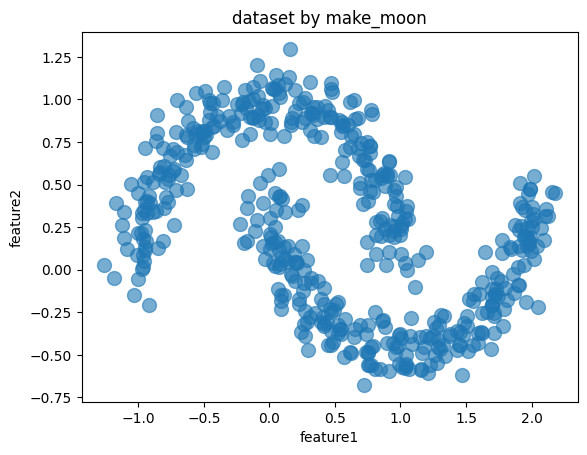

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets


X,_ = datasets.make_moons(500,noise = 0.1,random_state=1)
df = pd.DataFrame(X,columns = ['feature1','feature2'])

df.plot.scatter('feature1','feature2', s = 100,alpha = 0.6, title = 'dataset by make_moon')

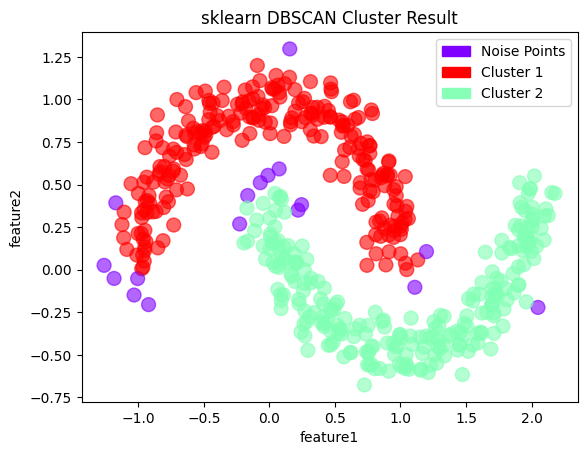

In [2]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=20)
dbscan.fit(X)
cluster_ids = dbscan.labels_

df = pd.DataFrame(np.c_[X, cluster_ids], columns=['feature1', 'feature2', 'cluster_id'])
df['cluster_id'] = df['cluster_id'].astype('i2')

# Plot the scatter plot
ax = df.plot.scatter('feature1', 'feature2', s=100,
                     c=list(df['cluster_id']), cmap='rainbow', colorbar=False,
                     alpha=0.6, title='sklearn DBSCAN Cluster Result')

noise_patch = mpatches.Patch(color='#8000ff', label='Noise Points')
cluster_patch1 = mpatches.Patch(color='#ff0000', label='Cluster 1')
cluster_patch2 = mpatches.Patch(color='#88ffb7', label='Cluster 2')

cluster_patches = [mpatches.Patch(color=plt.cm.rainbow(i/float(len(set(cluster_ids))-1)), label=f'Cluster {i}') 
                   for i in set(cluster_ids) if i != -1]

ax.legend(handles=[noise_patch, cluster_patch1, cluster_patch2], loc='upper right')

plt.show()
